In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
cluster1 = 10 * np.random.rand(100, 2)
cluster2 = 10 * np.random.rand(100, 2) + [10, 10]
cluster3 = 10 * np.random.rand(100, 2) + [-10, 10]

data = np.concatenate([cluster1, cluster2, cluster3])

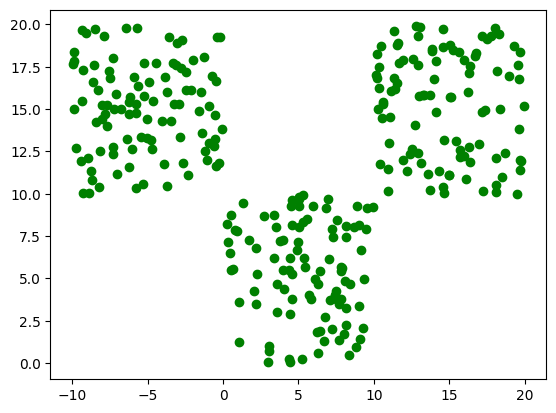

In [3]:
plt.scatter(data[:, 0], data[:, 1], color='green')

In [4]:
k_means = KMeans(n_clusters=3, n_init=10)
k_means.fit(data)

KMeans(n_clusters=3, n_init=10)

In [5]:
cluster_centroid_list = list(k_means.cluster_centers_)

centroid1, centroid2, centroid3 = sorted(cluster_centroid_list, key=lambda arr: arr[0])

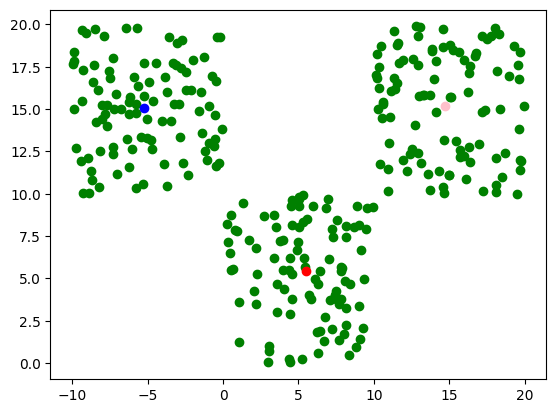

In [6]:
plt.scatter(data[:, 0], data[:, 1], color='green')
plt.scatter(centroid1[0], centroid1[1], color='blue')
plt.scatter(centroid2[0], centroid2[1], color='red')
plt.scatter(centroid3[0], centroid3[1], color='pink')

# Test

When the `KMeans` is built, centroids are created in any order by scikit-learn, so some extra steps have to be done in order to map the values correctly.

In [7]:
from numpy.testing import assert_array_equal

In [11]:
tests = [
  [-5, 12],
  [-100, 100],
  [0, 15],
  [0, 0],
  [2.5, 5],
  [9, 9],
  [17.5, 17],
  [100, 100]
]

def sorted_idx_to_centroids(indices):
    c = [centroid1, centroid2, centroid3]
    return list(map(lambda idx: c[idx], indices))

def original_idx_to_centroids(indices):
    c = k_means.cluster_centers_
    return list(map(lambda idx: c[idx], indices))

expected = sorted_idx_to_centroids([0, 0, 0, 1, 1, 1, 2, 2])
result = original_idx_to_centroids(k_means.predict(np.array(tests)))

assert_array_equal(expected, result)